# Final Project
Ananya Raman

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Remote Work and Mental Health 🌿📈

As remote work becomes the new norm, it's essential to understand its impact on employees' mental well-being. This dataset dives into how working remotely affects stress levels, work-life balance, and mental health conditions across various industries and regions.
With 5000 records collected from employees worldwide, this dataset provides valuable insights into key areas like work location (remote, hybrid, onsite), stress levels, access to mental health resources, and job satisfaction. It’s designed to help researchers, HR professionals, and businesses assess the growing influence of remote work on productivity and well-being.

This dataset is created by Iram Ramzan on [Kaggle](https://www.kaggle.com/datasets/iramshahzadi9/remote-work-and-mental-health/data).


In [3]:
library('tidyverse')
library('forcats')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
remote_mental <- read.csv('Impact_of_Remote_Work_on_Mental_Health.csv')
remote_mental |> head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
2,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
3,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
4,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
5,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
6,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,None,No,Increase,5,Unsatisfied,1,None,Average,South America


First, let's explore the idea that remote work decreases stress level. The heatmap below indicates higher number of employees with darker color. We see that hybrid workers have mostly low stress level, onsite workers have mostly high stress level, and remote workers have mostly low stress level. Thus, based on the visualization, we can conclude that the popular notion that remote work decreases stress is supported by our data.

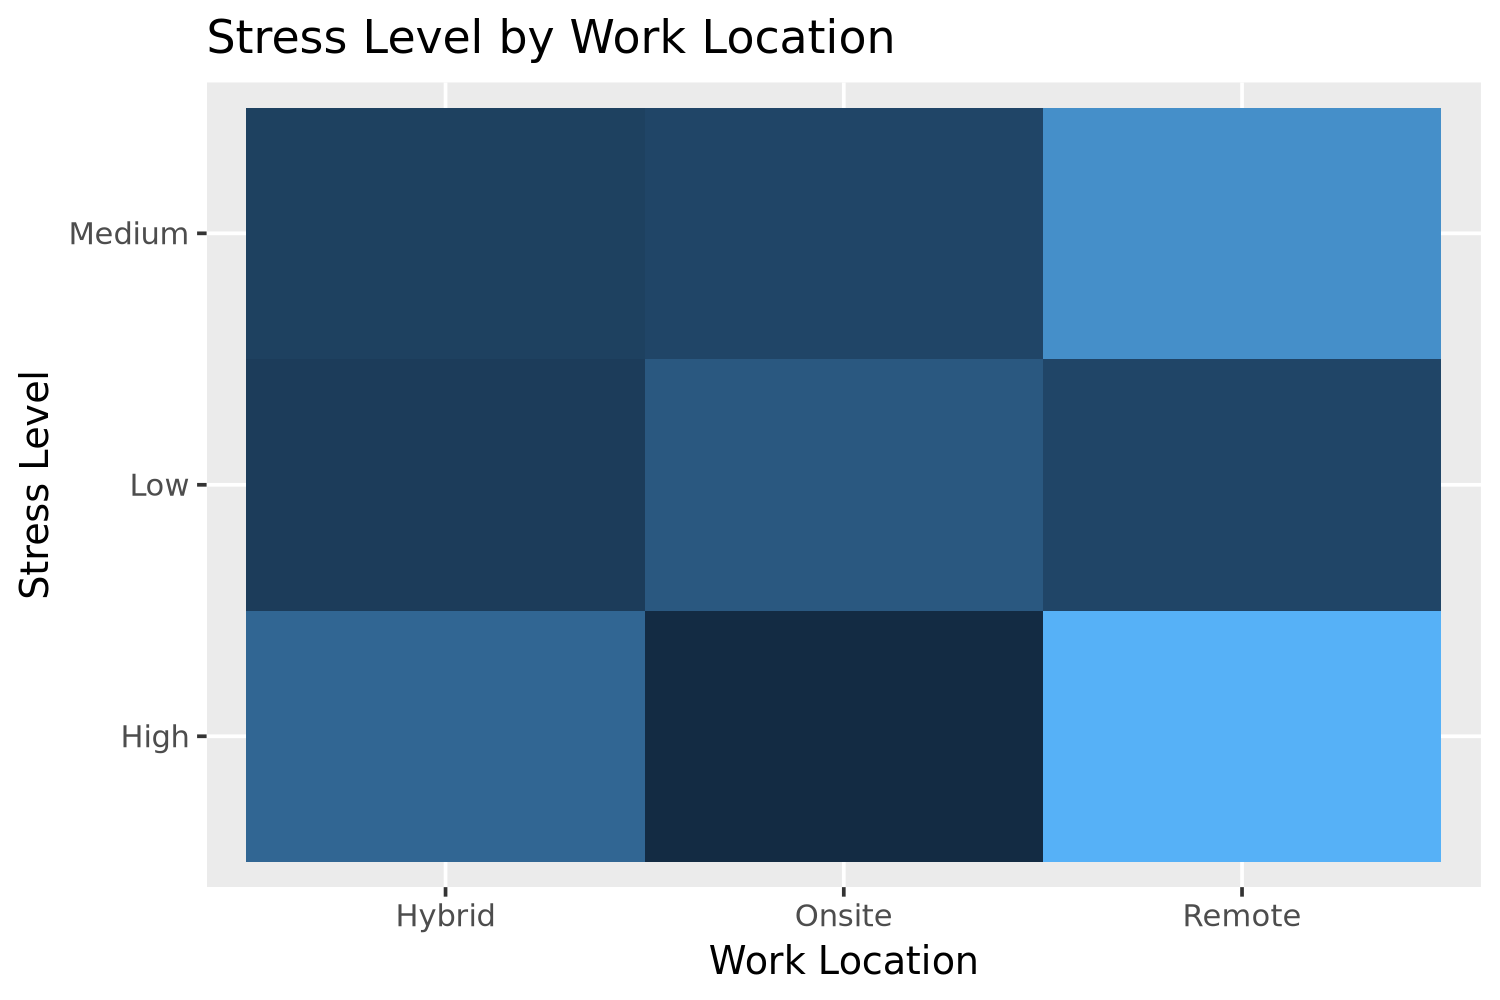

In [164]:
options(repr.plot.height = 4, repr.plot.width = 6)

ggplot(remote_mental, aes(x = Work_Location, y = Stress_Level)) +
    geom_bin_2d(show.legend = FALSE) +
    labs(title = 'Stress Level by Work Location',
         x = 'Work Location', y = 'Stress Level') 

Next, let's see what connections we can make between mental health condition and satisfaction with remote work. Running the bar chart below, we discover a few insights. First, we notice that employees with depression are most satisfied with remote work. This could be due to many reasons, one of which being that executive dysfunction and lack of motivation is a common symptom of depression. Working remotely in one's own space on one's own schedule offers more freedom and flexibility than working in the office does, potentially alleviating such symptoms. Similarly, employees with burnout feel mostly neutral or unsatisfied with remote work. This could be due to the monotony of working remotely, which also makes it difficult to differentiate work and life since both are being done from home. The repetitiveness could lead to mental exhaustion characterized by burnout.

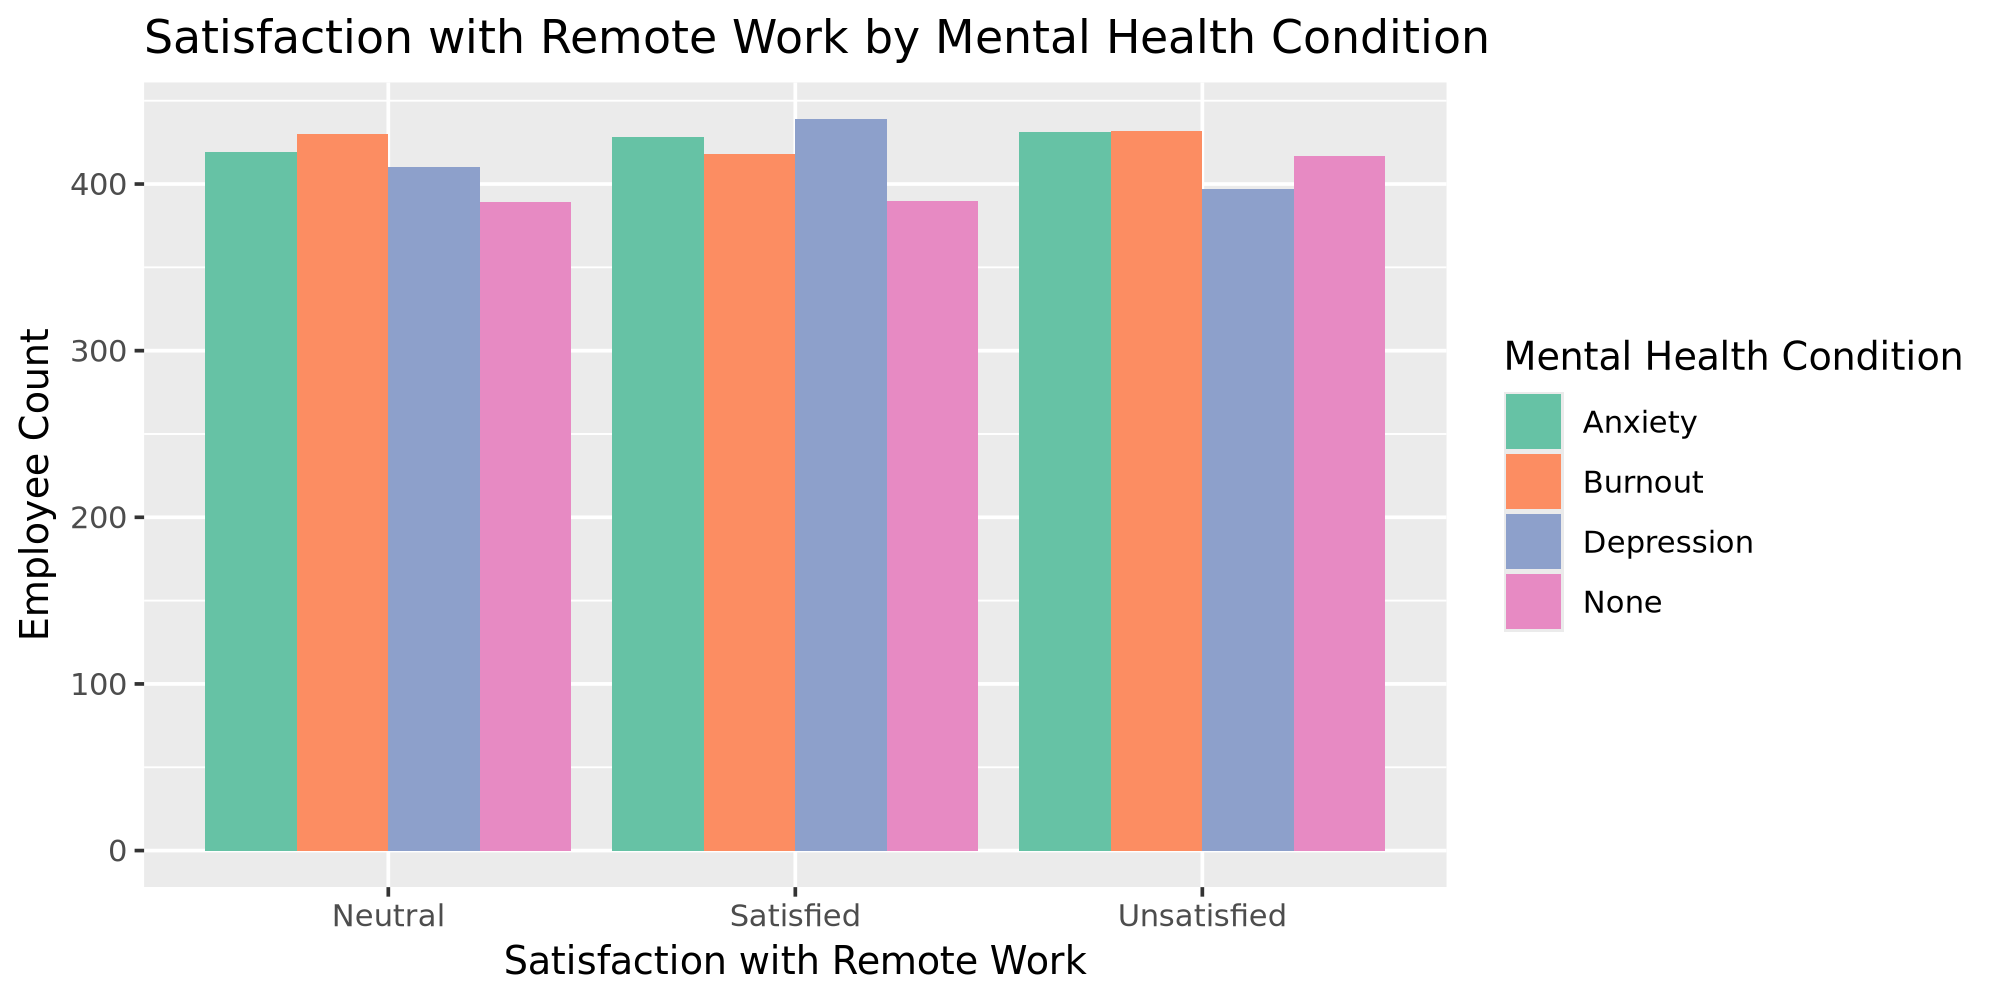

In [165]:
options(repr.plot.height = 4, repr.plot.width = 8)

remote_mental |>
    filter(!is.na(Mental_Health_Condition)) |>
    count(Mental_Health_Condition, Satisfaction_with_Remote_Work) |>
    mutate(Satisfaction_with_Remote_Work = fct_infreq(Satisfaction_with_Remote_Work)) |>
ggplot(aes(x = Satisfaction_with_Remote_Work, y = n, fill = Mental_Health_Condition)) +
    geom_col(position = 'dodge') +
    labs(title = 'Satisfaction with Remote Work by Mental Health Condition',
         x = 'Satisfaction with Remote Work', y = 'Employee Count', fill = 'Mental Health Condition') +
    scale_fill_brewer(palette = 'Set2')

Finally, let's explore the distribution of self-rated social isolation on a scale from 1 to 5, where 1 is feeling the least socially isolated and 5 is feeling the most. Running the line chart below, we discover surprising results. Onsite and hybrid workers are mostly either at 2 or 4 on the isolation scale, hybrid being more evenly distributed from 2-4. This is surprising, since onsite work is surrounded by coworker interaction, one would think social isolation is not much of an issue. However, thinking about it more closely, polarizing and/or toxic employee culture is much more common in-person, which could be a huge contributor to feeling unaccepted at the workplace and thus socially isolated. Another surprising result is that remote workers mostly report a 2 on the scale, indicating little social isolation. One would think working from home can get quite lonely, but the freedom that remote work often offers employees to work from anywhere in the country, allowing them to choose an ideal place to live. Similarly, the flexibility in scheduling can allow employees to choose their hours without the needless commute to and from the office, leaving them time to meet with friends and family after work unlike onsite work, in which free hours are few and far between.

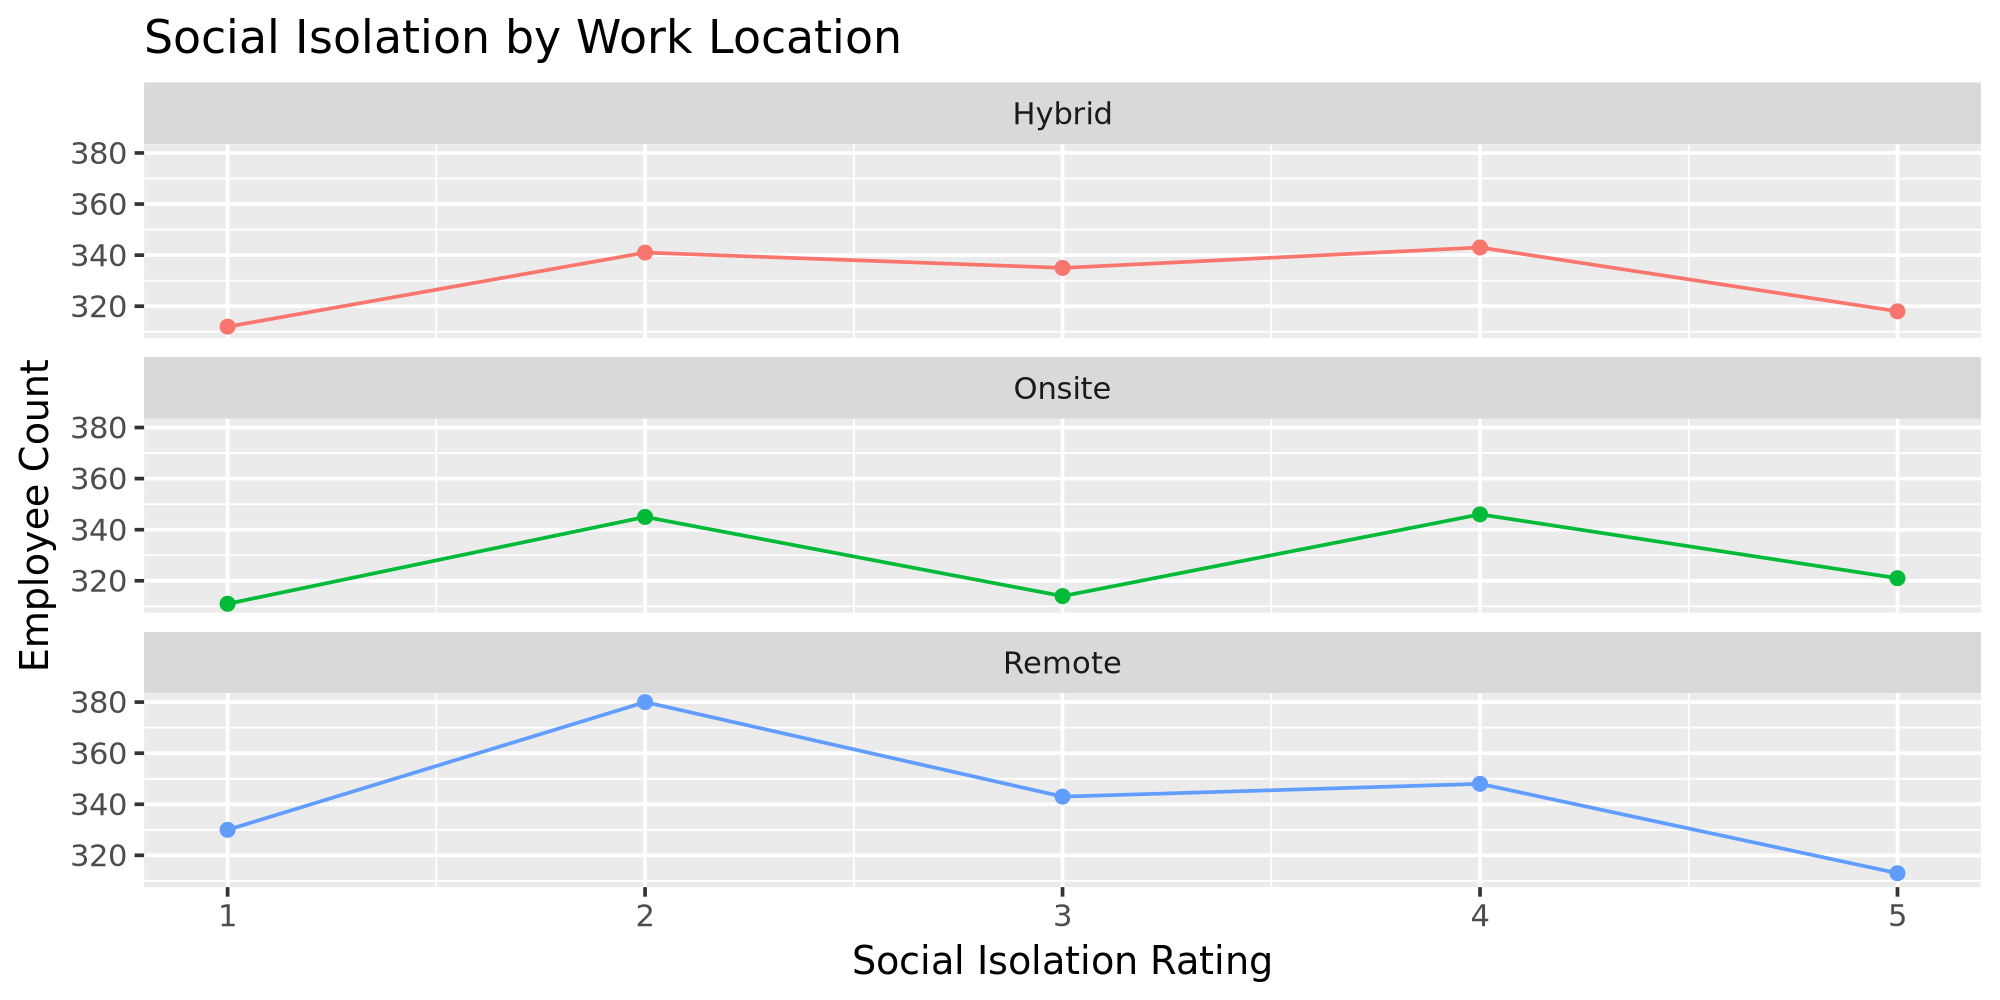

In [194]:
options(repr.plot.height = 4, repr.plot.width = 8)

remote_mental |>
    group_by(Social_Isolation_Rating, Work_Location) |>
    summarize(frequency = n(), .groups = 'drop') |>
ggplot(aes(x = Social_Isolation_Rating, y = frequency, color = Work_Location)) +
    geom_line(show.legend = FALSE) +
    geom_point(show.legend = FALSE) +
    facet_wrap(~Work_Location, ncol = 1) + 
    scale_x_continuous(breaks = 1:5) +
    labs(title = 'Social Isolation by Work Location',
         x = 'Social Isolation Rating', y = 'Employee Count') 